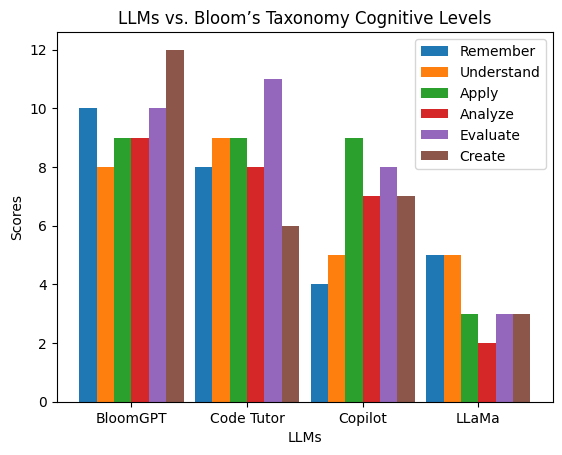

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
llms = ['BloomGPT', 'Code Tutor', 'Copilot', 'LLaMa']
remember = [10, 8, 4, 5]
understand = [8, 9, 5, 5]
apply = [9, 9, 9, 3]
analyze = [9, 8, 7, 2]
evaluate = [10, 11, 8, 3]
create = [12, 6, 7, 3]


fig, axes = plt.subplots(2, 2, figsize=(13, 10), sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()


# Setting the bar width
bar_width = 0.15
index = np.arange(len(llms))

# Plotting the bars for each Bloom's Taxonomy level
plt.bar(index, remember, bar_width, label='Remember')
plt.bar(index + bar_width, understand, bar_width, label='Understand')
plt.bar(index + 2*bar_width, apply, bar_width, label='Apply')
plt.bar(index + 3*bar_width, analyze, bar_width, label='Analyze')
plt.bar(index + 4*bar_width, evaluate, bar_width, label='Evaluate')
plt.bar(index + 5*bar_width, create, bar_width, label='Create')

# Labeling the axes and title
plt.xlabel('LLMs')
plt.ylabel('Scores')
plt.title('LLMs vs. Bloom’s Taxonomy Cognitive Levels')

# Adding the LLMs to the x-axis
plt.xticks(index + 2.5*bar_width, llms)

# Adding the legend
plt.legend()

# Displaying the plot
plt.show()


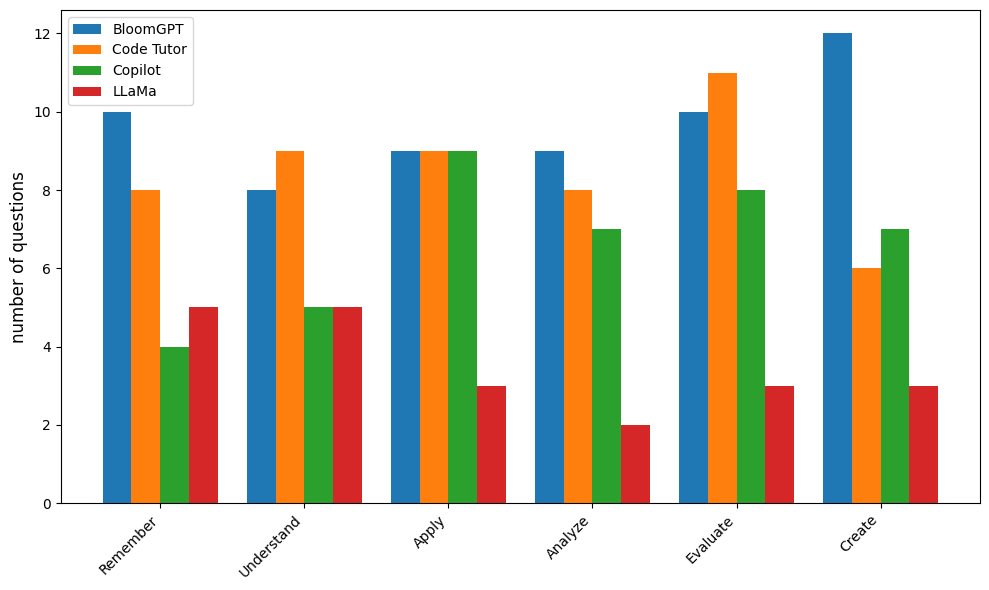

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
bloom_levels = ['Remember', 'Understand', 'Apply', 'Analyze', 'Evaluate', 'Create']
llms = ['BloomGPT', 'Code Tutor', 'Copilot', 'LLaMa']
bloomgpt = [10, 8, 9, 9, 10, 12]
code_tutor = [8, 9, 9, 8, 11, 6]
copilot = [4, 5, 9, 7, 8, 7]
llama = [5, 5, 3, 2, 3, 3]

# Setting the bar width
bar_width = 0.2
index = np.arange(len(bloom_levels))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))


# Plotting the bars for each LLM
ax.bar(index, bloomgpt, bar_width, label='BloomGPT')
ax.bar(index + bar_width, code_tutor, bar_width, label='Code Tutor')
ax.bar(index + 2*bar_width, copilot, bar_width, label='Copilot')
ax.bar(index + 3*bar_width, llama, bar_width, label='LLaMa')


# Labeling the axes and title
ax.set_ylabel('number of questions', fontsize=12)

# Adding the Bloom's levels to the x-axis
ax.set_xticks(index + 1.5*bar_width)
ax.set_xticklabels(bloom_levels, rotation=45, ha='right')

# Adding the legend
ax.legend()

# Displaying the plot
plt.tight_layout()
plt.show()





In [ ]:
import pandas as pd

# Load the dataset
# Replace 'your_dataset.csv' with the path to your actual file
df = pd.read_csv('/content/sample_data/Dataset for analysis-csv.csv')

# Reshape the data from wide to long format
# This step assumes that each expert's columns are structured in a similar naming pattern
long_df = pd.melt(df,
                  id_vars=['question_num', 'bloom_level', 'llm'],
                  value_vars=[
                      'expert1_bloom', 'expert1_subject', 'expert1_persian',
                      'expert2_bloom', 'expert2_subject', 'expert2_persian',
                      'expert3_bloom', 'expert3_subject', 'expert3_persian',
                      'expert4_bloom', 'expert4_subject', 'expert4_persian',
                      'expert5_bloom', 'expert5_subject', 'expert5_persian'
                  ],
                  var_name='expert_aspect',
                  value_name='score')

# Extract expert and aspect from 'expert_aspect' column
long_df[['expert', 'aspect']] = long_df['expert_aspect'].str.split('_', expand=True)

# Drop the original 'expert_aspect' column
long_df.drop(columns=['expert_aspect'], inplace=True)

# Calculate the average score for each expert for each aspect for each llm
average_scores = long_df.groupby(['llm', 'expert', 'aspect'])['score'].mean().reset_index()

# Output the result
print(average_scores)


    llm   expert   aspect     score
0     1  expert1    bloom  4.137931
1     1  expert1  persian  4.827586
2     1  expert1  subject  4.672414
3     1  expert2    bloom  3.517241
4     1  expert2  persian  4.517241
5     1  expert2  subject  3.103448
6     1  expert3    bloom  4.431034
7     1  expert3  persian  4.982759
8     1  expert3  subject  4.931034
9     1  expert4    bloom  3.500000
10    1  expert4  persian  3.603448
11    1  expert4  subject  3.672414
12    1  expert5    bloom  3.310345
13    1  expert5  persian  3.586207
14    1  expert5  subject  3.844828
15    2  expert1    bloom  4.392157
16    2  expert1  persian  4.823529
17    2  expert1  subject  4.784314
18    2  expert2    bloom  3.588235
19    2  expert2  persian  4.333333
20    2  expert2  subject  2.882353
21    2  expert3    bloom  4.686275
22    2  expert3  persian  4.941176
23    2  expert3  subject  4.921569
24    2  expert4    bloom  3.431373
25    2  expert4  persian  3.549020
26    2  expert4  subject  3

<ipython-input-49-24a42f8f8faa>:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


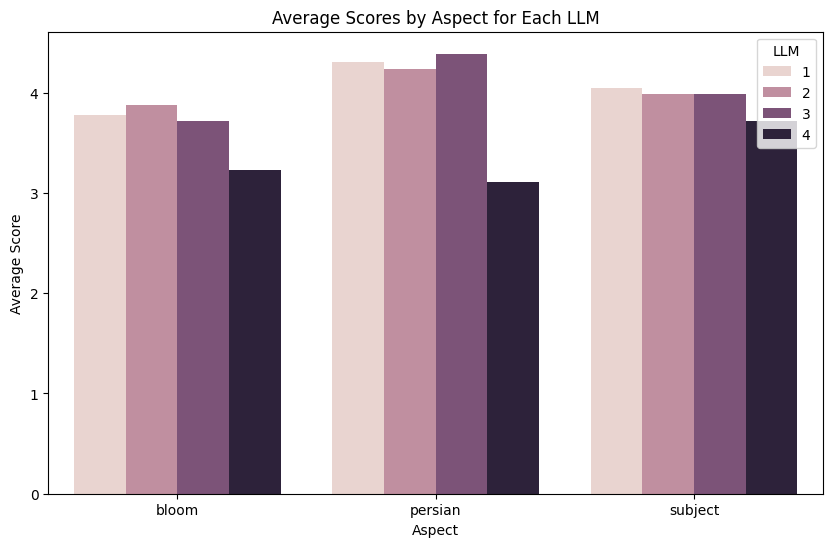

In [ ]:

# Reshape the data from wide to long format
long_df = pd.melt(
    df,
    id_vars=['question_num', 'bloom_level', 'llm'],
    value_vars=[
        'expert1_bloom', 'expert1_subject', 'expert1_persian',
        'expert2_bloom', 'expert2_subject', 'expert2_persian',
        'expert3_bloom', 'expert3_subject', 'expert3_persian',
        'expert4_bloom', 'expert4_subject', 'expert4_persian',
        'expert5_bloom', 'expert5_subject', 'expert5_persian'
    ],
    var_name='expert_aspect',
    value_name='score'
)

# Extract expert and aspect from 'expert_aspect' column
long_df[['expert', 'aspect']] = long_df['expert_aspect'].str.split('_', expand=True)

# Drop the original 'expert_aspect' column
long_df.drop(columns=['expert_aspect'], inplace=True)

# Calculate the average score for each expert for each aspect for each llm
average_scores = long_df.groupby(['llm', 'expert', 'aspect'])['score'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))

# Use seaborn to create a bar plot
sns.barplot(
    data=average_scores,
    x='aspect',
    y='score',
    hue='llm',
    ci=None
)

# Customize the plot
plt.title('Average Scores by Aspect for Each LLM')
plt.xlabel('Aspect')
plt.ylabel('Average Score')
plt.legend(title='LLM')

# Show the plot
plt.show()


<ipython-input-51-539141d3645f>:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


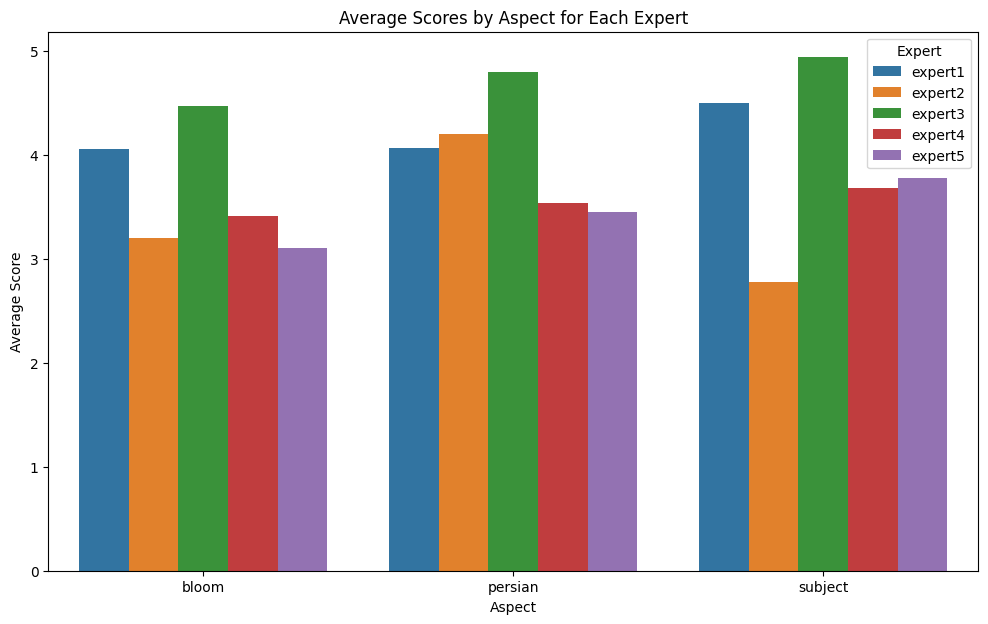

In [ ]:

# Reshape the data from wide to long format
long_df = pd.melt(
    df,
    id_vars=['question_num', 'bloom_level', 'llm'],
    value_vars=[
        'expert1_bloom', 'expert1_subject', 'expert1_persian',
        'expert2_bloom', 'expert2_subject', 'expert2_persian',
        'expert3_bloom', 'expert3_subject', 'expert3_persian',
        'expert4_bloom', 'expert4_subject', 'expert4_persian',
        'expert5_bloom', 'expert5_subject', 'expert5_persian'
    ],
    var_name='expert_aspect',
    value_name='score'
)

# Extract expert and aspect from 'expert_aspect' column
long_df[['expert', 'aspect']] = long_df['expert_aspect'].str.split('_', expand=True)

# Drop the original 'expert_aspect' column
long_df.drop(columns=['expert_aspect'], inplace=True)

# Calculate the average score for each expert for each aspect for each llm
average_scores = long_df.groupby(['llm', 'expert', 'aspect'])['score'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 7))

# Use seaborn to create a bar plot with 'expert' as hue
sns.barplot(
    data=average_scores,
    x='aspect',
    y='score',
    hue='expert',
    ci=None
)

# Customize the plot
plt.title('Average Scores by Aspect for Each Expert')
plt.xlabel('Aspect')
plt.ylabel('Average Score')
plt.legend(title='Expert')

# Show the plot
plt.show()


   llm  overall_average_score
0    1               4.042529
1    2               4.036601
2    3               4.031667
3    4               3.352381


<ipython-input-56-9ba797b4a422>:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


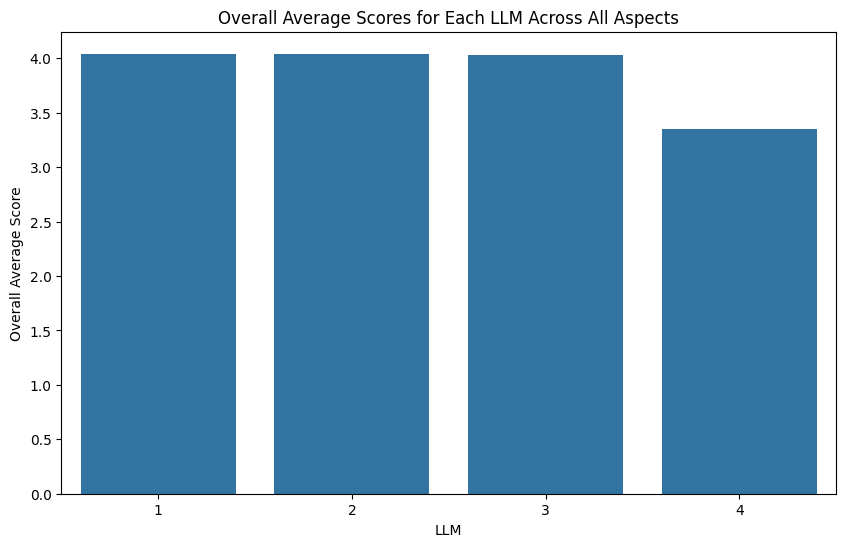

In [ ]:

# Reshape the data from wide to long format
long_df = pd.melt(
    df,
    id_vars=['question_num', 'bloom_level', 'llm'],
    value_vars=[
        'expert1_bloom', 'expert1_subject', 'expert1_persian',
        'expert2_bloom', 'expert2_subject', 'expert2_persian',
        'expert3_bloom', 'expert3_subject', 'expert3_persian',
        'expert4_bloom', 'expert4_subject', 'expert4_persian',
        'expert5_bloom', 'expert5_subject', 'expert5_persian'
    ],
    var_name='expert_aspect',
    value_name='score'
)

# Extract expert and aspect from 'expert_aspect' column
long_df[['expert', 'aspect']] = long_df['expert_aspect'].str.split('_', expand=True)

# Drop the original 'expert_aspect' column
long_df.drop(columns=['expert_aspect'], inplace=True)

# Calculate the average score for each aspect for each llm across all experts
average_scores = long_df.groupby(['llm', 'aspect'])['score'].mean().reset_index()

# Calculate the overall average score across the three aspects for each LLM
overall_average_scores = average_scores.groupby('llm')['score'].mean().reset_index()

# Rename columns for clarity
overall_average_scores.columns = ['llm', 'overall_average_score']

# Display the overall average scores
print(overall_average_scores)

# Plot the overall average scores for each LLM
plt.figure(figsize=(10, 6))
sns.barplot(
    data=overall_average_scores,
    x='llm',
    y='overall_average_score',
    ci=None
)

# Customize the plot
plt.title('Overall Average Scores for Each LLM Across All Aspects')
plt.xlabel('LLM')
plt.ylabel('Overall Average Score')

# Show the plot
plt.show()


In [ ]:
pip install statsmodels


In [ ]:
pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 1.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.metrics import cohen_kappa_score
from statsmodels.stats.inter_rater import fleiss_kappa


In [ ]:
df = pd.read_csv('/content/sample_data/Dataset for analysis-csv.csv')

for col in ['expert1_bloom', 'expert1_subject', 'expert1_persian',
            'expert2_bloom', 'expert2_subject', 'expert2_persian',
            'expert3_bloom', 'expert3_subject', 'expert3_persian',
            'expert4_bloom', 'expert4_subject', 'expert4_persian',
            'expert5_bloom', 'expert5_subject', 'expert5_persian']:
    df[col] -= 3

# Calculate the average scores for each aspect per LLM
df['bloom_mean'] = df[[f'expert{i}_bloom' for i in range(1, 6)]].mean(axis=1)
df['subject_mean'] = df[[f'expert{i}_subject' for i in range(1, 6)]].mean(axis=1)
df['persian_mean'] = df[[f'expert{i}_persian' for i in range(1, 6)]].mean(axis=1)


In [ ]:
df

,question_num,expert1_bloom,expert1_subject,expert1_persian,expert2_bloom,expert2_subject,expert2_persian,expert3_bloom,expert3_subject,expert3_persian,...,expert4_subject,expert4_persian,expert5_bloom,expert5_subject,expert5_persian,bloom_level,llm,bloom_mean,subject_mean,persian_mean
0,1,2,0,1,-1,-1,0,2,2,2,...,1,1,-1,1,0,1,1,0.6,0.6,0.8
1,1,2,0,1,-1,-1,0,2,2,2,...,1,1,-1,1,0,1,2,0.6,0.6,0.8
2,1,2,0,1,-1,-1,0,2,2,2,...,1,1,-1,1,0,1,3,0.6,0.6,0.8
3,1,2,0,1,-1,-1,0,2,2,2,...,1,1,-1,1,0,1,4,0.6,0.6,0.8
4,2,1,1,2,0,0,2,2,2,2,...,1,1,0,1,0,1,1,0.6,1.0,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,118,2,0,2,0,-1,2,2,2,2,...,1,1,1,1,1,6,3,0.8,0.6,1.6
166,119,-1,1,2,-1,1,1,2,2,2,...,1,1,0,1,1,6,3,-0.2,1.2,1.4
167,120,-1,1,-2,-2,-2,-2,2,2,1,...,0,-1,-1,0,-1,6,4,-0.6,0.2,-1.0
168,121,0,-1,-2,-1,-2,-2,1,2,1,...,1,1,1,1,-1,6,4,0.6,0.2,-0.6


In [ ]:
# ANOVA test for each aspect
anova_bloom = f_oneway(*[df[df['llm'] == llm]['bloom_mean'] for llm in df['llm'].unique()])
anova_subject = f_oneway(*[df[df['llm'] == llm]['subject_mean'] for llm in df['llm'].unique()])
anova_persian = f_oneway(*[df[df['llm'] == llm]['persian_mean'] for llm in df['llm'].unique()])

print("ANOVA Results for Bloom Alignment: ", anova_bloom)
print("ANOVA Results for Subject Suitability: ", anova_subject)
print("ANOVA Results for Persian Clarity: ", anova_persian)

# Post-hoc test
for aspect in ['bloom_mean', 'subject_mean', 'persian_mean']:
    tukey = pairwise_tukeyhsd(endog=df[aspect], groups=df['llm'], alpha=0.05)
    print(f"\nPost-hoc test for {aspect}:\n", tukey)


ANOVA Results for Bloom Alignment:  F_onewayResult(statistic=6.589776827731827, pvalue=0.0003103608601602181)
ANOVA Results for Subject Suitability:  F_onewayResult(statistic=7.333640807977937, pvalue=0.0001202604615788771)
ANOVA Results for Persian Clarity:  F_onewayResult(statistic=56.63213624145737, pvalue=2.8998031966902094e-25)

Post-hoc test for bloom_mean:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2    0.103 0.7898 -0.1851  0.3912  False
     1      3  -0.0643 0.9488 -0.3728  0.2442  False
     1      4  -0.5507 0.0014  -0.933 -0.1685   True
     2      3  -0.1674 0.5199 -0.4844  0.1497  False
     2      4  -0.6538 0.0001 -1.0429 -0.2646   True
     3      4  -0.4864 0.0113 -0.8909  -0.082   True
----------------------------------------------------

Post-hoc test for subject_mean:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 me

<ipython-input-13-6ab9f8b94a10>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='llm', y='bloom_mean', data=df, ax=axes[0], palette=palette)
<ipython-input-13-6ab9f8b94a10>:13: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.boxplot(x='llm', y='bloom_mean', data=df, ax=axes[0], palette=palette)
<ipython-input-13-6ab9f8b94a10>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='llm', y='subject_mean', data=df, ax=axes[1], palette=palette)
<ipython-input-13-6ab9f8b94a10>:14: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.boxplot(x='llm', y='subject_mean', data=df, ax=axes[1], palet

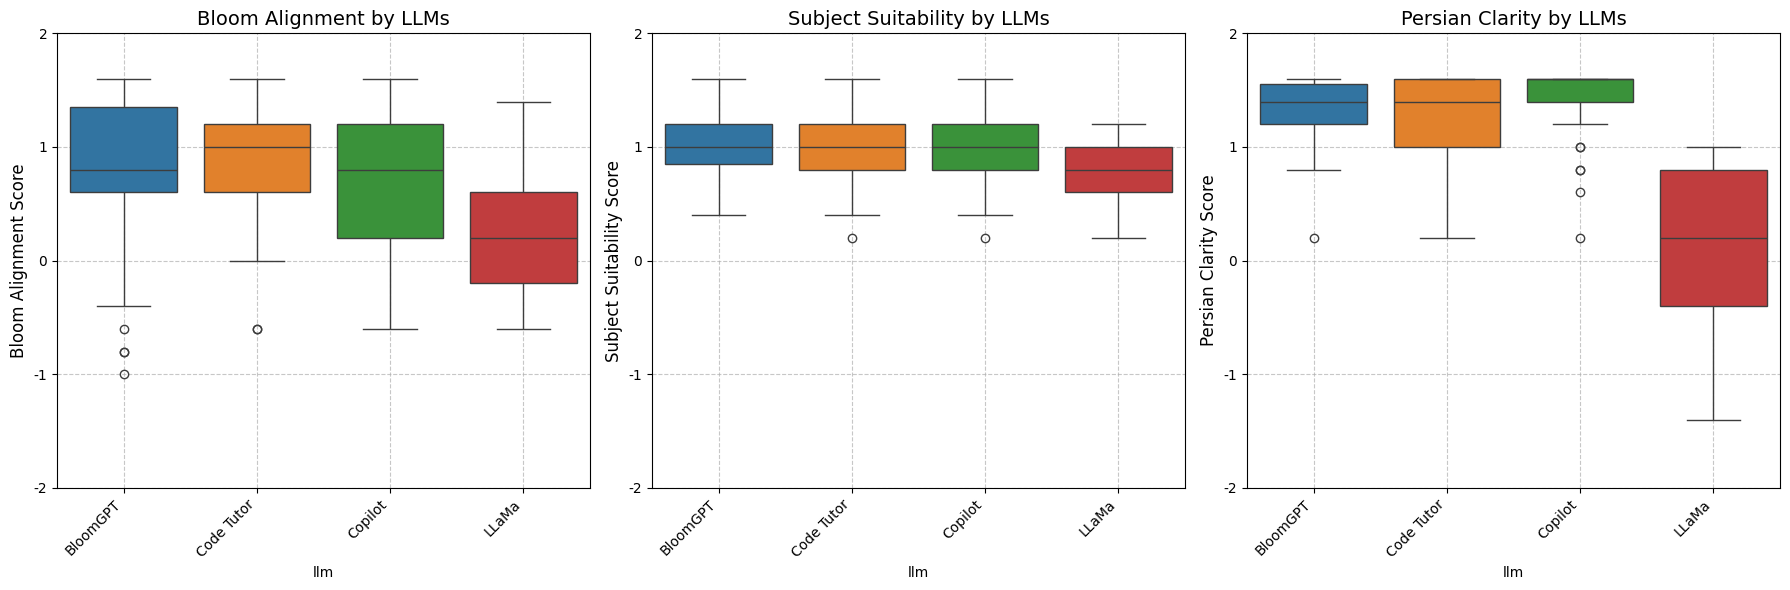

In [ ]:
# swarmplots

# Define the y-axis limits
y_limits = (-2, 2)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Define a color palette
palette = sns.color_palette("tab10")

# Plot each boxplot with a palette
sns.boxplot(x='llm', y='bloom_mean', data=df, ax=axes[0], palette=palette)
sns.boxplot(x='llm', y='subject_mean', data=df, ax=axes[1], palette=palette)
sns.boxplot(x='llm', y='persian_mean', data=df, ax=axes[2], palette=palette)

# Add grid lines
for ax in axes:
    ax.grid(True, linestyle='--', alpha=0.7)


# Set the same y-axis limits for all plots
for ax in axes:
    ax.set_ylim(y_limits)
    ax.set_yticks([-2, -1, 0, 1, 2])
    ax.set_yticklabels([-2, -1, 0, 1, 2])

axes[0].set_ylabel('Bloom Alignment Score', fontsize=12)
axes[1].set_ylabel('Subject Suitability Score', fontsize=12)
axes[2].set_ylabel('Persian Clarity Score', fontsize=12)


# Set titles with larger font size
axes[0].set_title('Bloom Alignment by LLMs', fontsize=14)
axes[1].set_title('Subject Suitability by LLMs', fontsize=14)
axes[2].set_title('Persian Clarity by LLMs', fontsize=14)

# Set x-axis labels with manual values and rotate labels if needed
llm_labels = ['BloomGPT', 'Code Tutor', 'Copilot', 'LLaMa']
for ax in axes:
    ax.set_xticks(range(len(llm_labels)))
    ax.set_xticklabels(llm_labels, rotation=45, ha='right')

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

ANOVA Results for Bloom Level 1:  F_onewayResult(statistic=1.5963337074448187, pvalue=0.21754362517477804)

Post-hoc test for Bloom Level 1:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2     0.05 0.9969 -0.6245 0.7245  False
     1      3     -0.4 0.5625 -1.2412 0.4412  False
     1      4    -0.46 0.3799 -1.2388 0.3188  False
     2      3    -0.45 0.4941 -1.3207 0.4207  False
     2      4    -0.51 0.3264 -1.3206 0.3006  False
     3      4    -0.06 0.9981 -1.0138 0.8938  False
---------------------------------------------------
ANOVA Results for Bloom Level 2:  F_onewayResult(statistic=2.5371540401366386, pvalue=0.08165720744535691)


<ipython-input-7-1019225974a7>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='llm', y='bloom_mean', data=subset, palette=palette, ax=ax)
<ipython-input-7-1019225974a7>:35: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.boxplot(x='llm', y='bloom_mean', data=subset, palette=palette, ax=ax)



Post-hoc test for Bloom Level 2:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.2861 0.4028 -0.2114 0.7836  False
     1      3    0.135 0.9179 -0.4486 0.7186  False
     1      4   -0.265 0.5986 -0.8486 0.3186  False
     2      3  -0.1511 0.8831 -0.7221 0.4199  False
     2      4  -0.5511 0.0612 -1.1221 0.0199  False
     3      4     -0.4 0.3417 -1.0475 0.2475  False
---------------------------------------------------
ANOVA Results for Bloom Level 3:  F_onewayResult(statistic=2.0195885928003734, pvalue=0.13581965180674502)


<ipython-input-7-1019225974a7>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='llm', y='bloom_mean', data=subset, palette=palette, ax=ax)
<ipython-input-7-1019225974a7>:35: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.boxplot(x='llm', y='bloom_mean', data=subset, palette=palette, ax=ax)



Post-hoc test for Bloom Level 3:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2  -0.0889 0.9806 -0.7274 0.5496  False
     1      3   0.0444 0.9975  -0.594 0.6829  False
     1      4  -0.7333 0.1422 -1.6363 0.1696  False
     2      3   0.1333 0.9393 -0.5052 0.7718  False
     2      4  -0.6444 0.2296 -1.5474 0.2585  False
     3      4  -0.7778 0.1098 -1.6807 0.1252  False
---------------------------------------------------
ANOVA Results for Bloom Level 4:  F_onewayResult(statistic=6.170470141259958, pvalue=0.0033182252322939594)


<ipython-input-7-1019225974a7>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='llm', y='bloom_mean', data=subset, palette=palette, ax=ax)
<ipython-input-7-1019225974a7>:35: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.boxplot(x='llm', y='bloom_mean', data=subset, palette=palette, ax=ax)



Post-hoc test for Bloom Level 4:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.0944 0.9665 -0.6619   0.473  False
     1      3  -0.7302 0.0115 -1.3187 -0.1417   True
     1      4  -0.9444 0.0408 -1.8573 -0.0316   True
     2      3  -0.6357 0.0369 -1.2401 -0.0313   True
     2      4    -0.85 0.0784 -1.7732  0.0732  False
     3      4  -0.2143 0.9194 -1.1506   0.722  False
----------------------------------------------------
ANOVA Results for Bloom Level 5:  F_onewayResult(statistic=2.398786778521197, pvalue=0.0890654046509717)


<ipython-input-7-1019225974a7>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='llm', y='bloom_mean', data=subset, palette=palette, ax=ax)
<ipython-input-7-1019225974a7>:35: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.boxplot(x='llm', y='bloom_mean', data=subset, palette=palette, ax=ax)



Post-hoc test for Bloom Level 5:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2  -0.2545 0.7738 -0.9798 0.4707  False
     1      3   -0.325 0.6763 -1.1124 0.4624  False
     1      4  -1.0667 0.0576 -2.1593  0.026  False
     2      3  -0.0705 0.9944 -0.8417 0.7008  False
     2      4  -0.8121 0.1941 -1.8933  0.269  False
     3      4  -0.7417 0.2936 -1.8654 0.3821  False
---------------------------------------------------
ANOVA Results for Bloom Level 6:  F_onewayResult(statistic=2.003861500836659, pvalue=0.14029288297114362)


<ipython-input-7-1019225974a7>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='llm', y='bloom_mean', data=subset, palette=palette, ax=ax)
<ipython-input-7-1019225974a7>:35: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.boxplot(x='llm', y='bloom_mean', data=subset, palette=palette, ax=ax)



Post-hoc test for Bloom Level 6:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.6167 0.2917 -0.3213 1.5546  False
     1      3   0.5357 0.3677 -0.3565 1.4279  False
     1      4  -0.2167 0.9598 -1.4276 0.9942  False
     2      3   -0.081 0.9964 -1.1246 0.9627  False
     2      4  -0.8333 0.3293 -2.1598 0.4932  False
     3      4  -0.7524 0.3957 -2.0469 0.5421  False
---------------------------------------------------


<ipython-input-7-1019225974a7>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='llm', y='bloom_mean', data=subset, palette=palette, ax=ax)
<ipython-input-7-1019225974a7>:35: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.boxplot(x='llm', y='bloom_mean', data=subset, palette=palette, ax=ax)


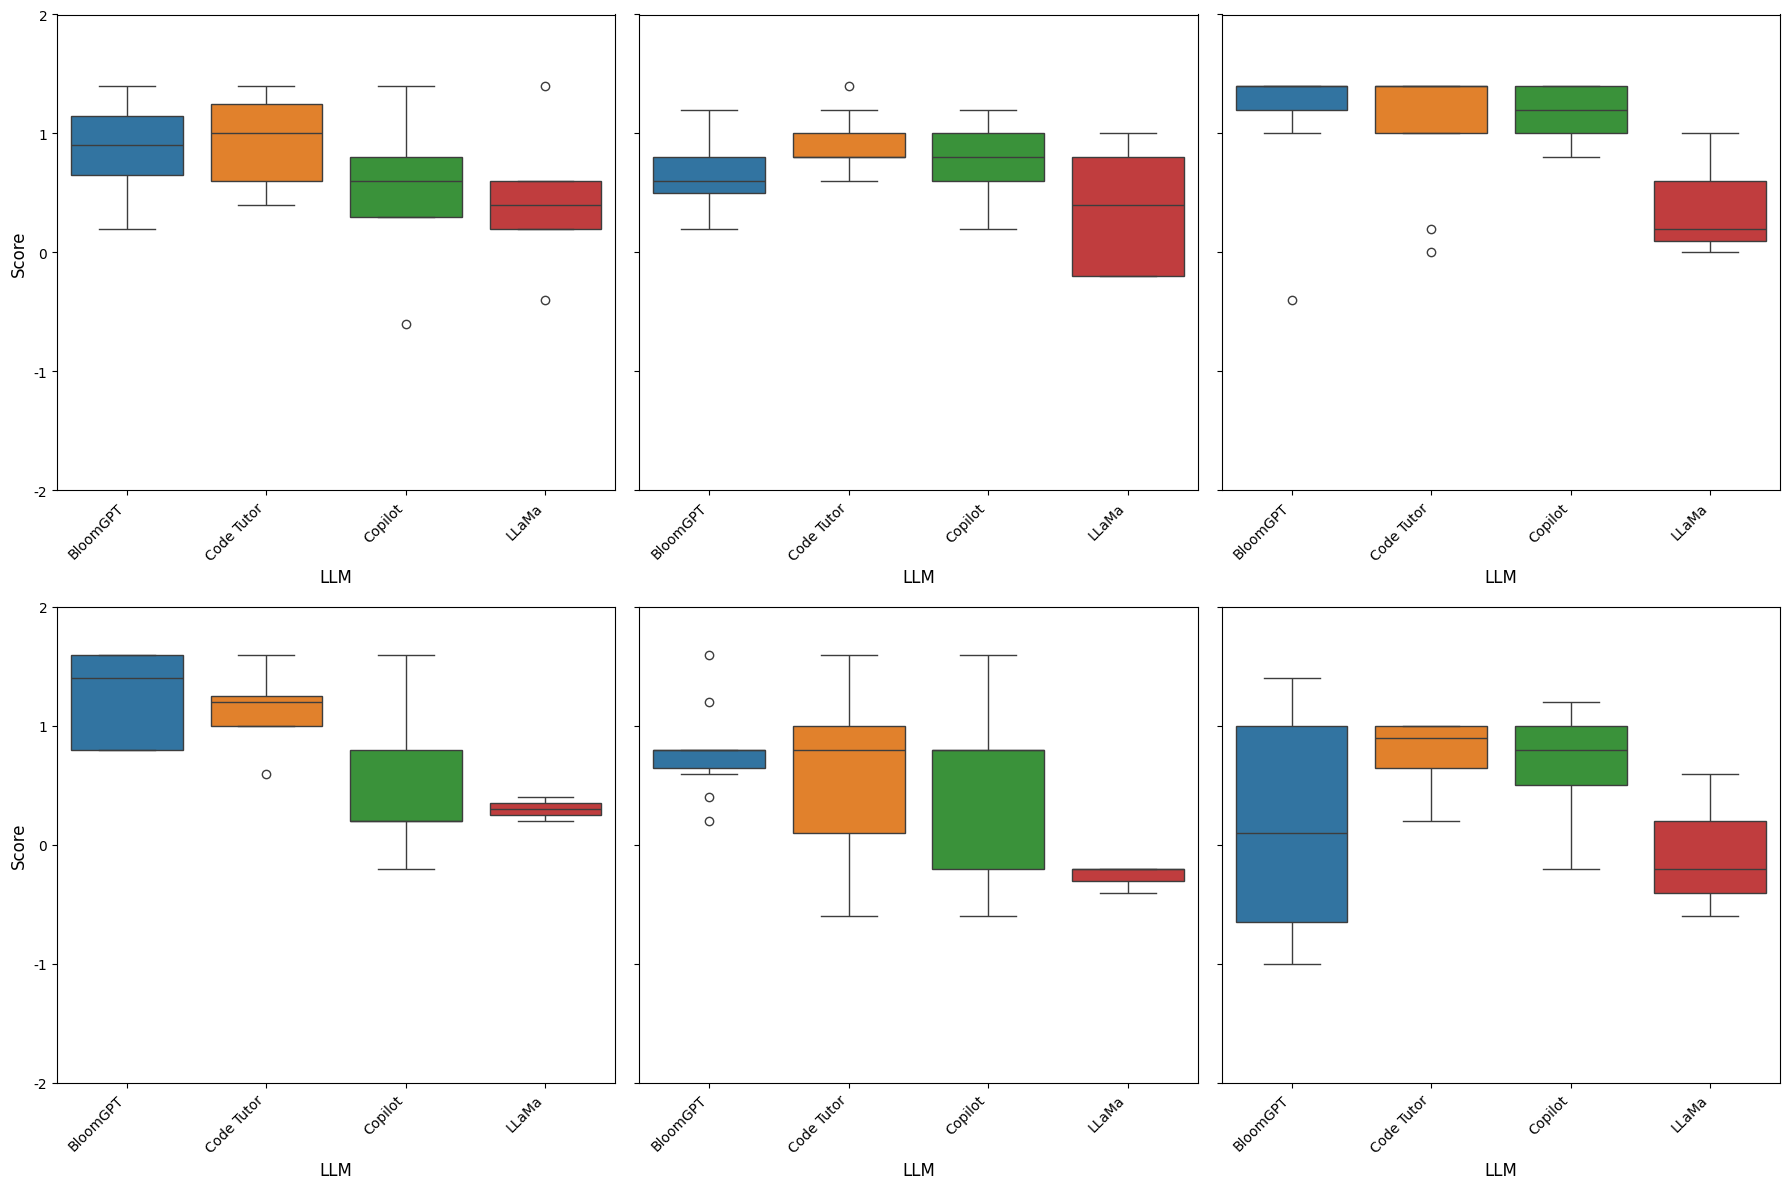

In [ ]:
# Define Bloom level labels for clarity
bloom_level_labels = {
    1: "Remember",
    2: "Understand",
    3: "Apply",
    4: "Analyze",
    5: "Evaluate",
    6: "Create"
}
bloom_levels = df['bloom_level'].unique()
# Create a figure with 6 subplots (2 rows x 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(18, 12), sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Set y-axis limits
y_limits = (-2, 2)

# Iterate over each Bloom level and its corresponding subplot
for idx, level in enumerate(bloom_levels):
    subset = df[df['bloom_level'] == level]

    # Perform ANOVA
    anova = f_oneway(*[subset[subset['llm'] == llm]['bloom_mean'] for llm in subset['llm'].unique()])
    print(f"ANOVA Results for Bloom Level {level}: ", anova)

    # Post-hoc test
    tukey = pairwise_tukeyhsd(endog=subset['bloom_mean'], groups=subset['llm'], alpha=0.05)
    print(f"\nPost-hoc test for Bloom Level {level}:\n", tukey)

    # Plotting
    ax = axes[idx]
    palette = sns.color_palette("tab10")
    sns.boxplot(x='llm', y='bloom_mean', data=subset, palette=palette, ax=ax)

    ax.set_ylim(y_limits)
    ax.set_yticks([-2, -1, 0, 1, 2])
    ax.set_yticklabels([-2, -1, 0, 1, 2])
    ax.set_xlabel('LLM', fontsize=12)
    ax.set_ylabel('Score', fontsize=12)

    # Set x-axis labels
    llm_labels = ['BloomGPT', 'Code Tutor', 'Copilot', 'LLaMa']
    ax.set_xticks(range(len(llm_labels)))
    ax.set_xticklabels(llm_labels, rotation=45, ha='right')

    # Set title for each subplot
    # ax.set_title(f'Bloom Alignment by LLM for Level "{bloom_level_labels[level]}"', fontsize=14)

# Adjust layout to prevent clipping and show the plot
plt.tight_layout()
plt.show()


ANOVA Results for LLM 1:  F_onewayResult(statistic=5.456765553913385, pvalue=0.000413823816268813)

Post-hoc test for LLM 1:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   -0.275 0.8949 -1.0429  0.4929  False
     1      3   0.2333 0.9374 -0.5104  0.9771  False
     1      4   0.3444 0.7443 -0.3993  1.0882  False
     1      5     -0.1 0.9985 -0.8239  0.6239  False
     1      6    -0.75 0.0268 -1.4431 -0.0569   True
     2      3   0.5083 0.4066 -0.2783  1.2949  False
     2      4   0.6194 0.2009 -0.1671   1.406  False
     2      5    0.175  0.984 -0.5929  0.9429  False
     2      6   -0.475 0.4126 -1.2139  0.2639  False
     3      4   0.1111  0.998  -0.652  0.8742  False
     3      5  -0.3333 0.7694 -1.0771  0.4104  False
     3      6  -0.9833 0.0021 -1.6972 -0.2695   True
     4      5  -0.4444 0.4948 -1.1882  0.2993  False
     4      6  -1.0944 0.0

<ipython-input-8-dcc34a30cc0e>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bloom_level', y='bloom_mean', data=subset, palette=palette, ax=ax)



Post-hoc test for LLM 2:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2  -0.0389    1.0 -0.7338  0.656  False
     1      3   0.0944 0.9985 -0.6005 0.7893  False
     1      4      0.2 0.9598 -0.5151 0.9151  False
     1      5  -0.4045 0.4688 -1.0691   0.26  False
     1      6  -0.1833 0.9802 -0.9557  0.589  False
     2      3   0.1333 0.9913 -0.5408 0.8075  False
     2      4   0.2389 0.9077  -0.456 0.9338  False
     2      5  -0.3657 0.5435 -1.0084 0.2771  False
     2      6  -0.1444 0.9925 -0.8982 0.6093  False
     3      4   0.1056 0.9975 -0.5893 0.8005  False
     3      5   -0.499 0.2114 -1.1418 0.1438  False
     3      6  -0.2778 0.8801 -1.0315  0.476  False
     4      5  -0.6045 0.0936 -1.2691   0.06  False
     4      6  -0.3833 0.6802 -1.1557  0.389  False
     5      6   0.2212 0.9427 -0.5046  0.947  False
-------------------------------------

<ipython-input-8-dcc34a30cc0e>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bloom_level', y='bloom_mean', data=subset, palette=palette, ax=ax)



Post-hoc test for LLM 3:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2     0.26 0.9815 -0.8726 1.3926  False
     1      3   0.6778 0.3546 -0.3368 1.6924  False
     1      4   0.0143    1.0  -1.044 1.0726  False
     1      5   -0.025    1.0 -1.0589 1.0089  False
     1      6   0.1857 0.9946 -0.8726  1.244  False
     2      3   0.4178 0.7616  -0.524 1.3595  False
     2      4  -0.2457 0.9739 -1.2343 0.7429  False
     2      5   -0.285 0.9454 -1.2475 0.6775  False
     2      6  -0.0743 0.9999 -1.0629 0.9143  False
     3      4  -0.6635 0.2014 -1.5144 0.1874  False
     3      5  -0.7028 0.1287 -1.5232 0.1176  False
     3      6  -0.4921 0.5128 -1.3429 0.3588  False
     4      5  -0.0393    1.0 -0.9131 0.8346  False
     4      6   0.1714 0.9921 -0.7311 1.0739  False
     5      6   0.2107 0.9771 -0.6631 1.0846  False
-------------------------------------

<ipython-input-8-dcc34a30cc0e>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bloom_level', y='bloom_mean', data=subset, palette=palette, ax=ax)



Post-hoc test for LLM 4:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2    -0.08 0.9999 -1.1798 1.0198  False
     1      3    -0.04    1.0   -1.31   1.23  False
     1      4    -0.14 0.9995  -1.595  1.315  False
     1      5  -0.7067 0.4896 -1.9767 0.5633  False
     1      6  -0.5067 0.7827 -1.7767 0.7633  False
     2      3     0.04    1.0   -1.23   1.31  False
     2      4    -0.06    1.0  -1.515  1.395  False
     2      5  -0.6267 0.6088 -1.8967 0.6433  False
     2      6  -0.4267 0.8773 -1.6967 0.8433  False
     3      4     -0.1 0.9999 -1.6875 1.4875  False
     3      5  -0.6667 0.6546 -2.0866 0.7532  False
     3      6  -0.4667 0.8866 -1.8866 0.9532  False
     4      5  -0.5667 0.8486 -2.1541 1.0208  False
     4      6  -0.3667 0.9718 -1.9541 1.2208  False
     5      6      0.2  0.997 -1.2199 1.6199  False
-------------------------------------

<ipython-input-8-dcc34a30cc0e>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bloom_level', y='bloom_mean', data=subset, palette=palette, ax=ax)


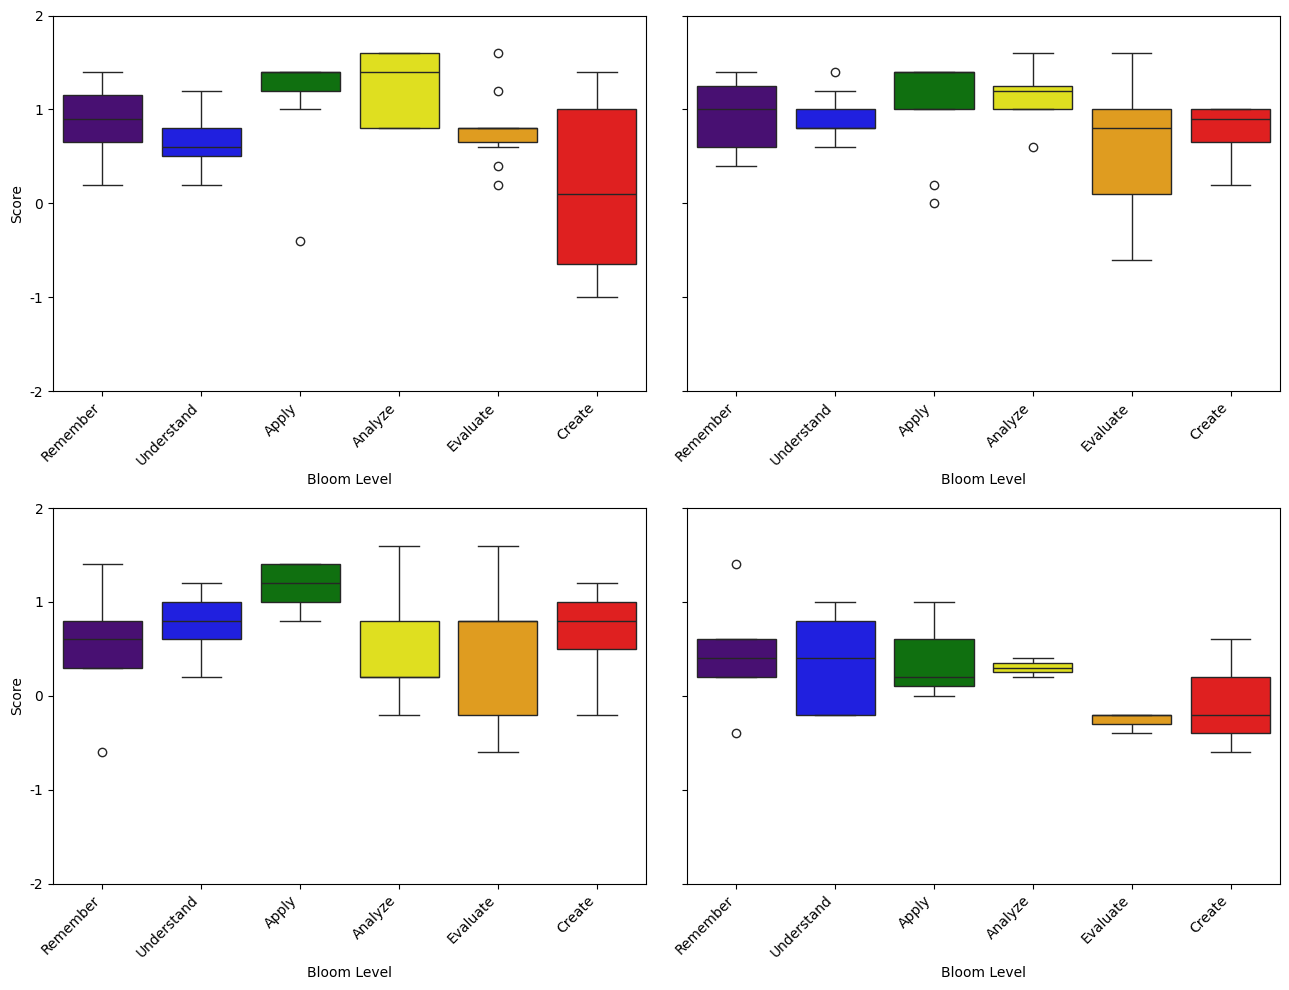

In [ ]:
llm_labels = {
    1: "BloomGPT",
    2: "Code Tutor",
    3: "Copilot",
    4: "LLaMa"
}


# Define LLMs and Bloom levels
llms = df['llm'].unique()
bloom_levels = sorted(df['bloom_level'].unique())  # Ensure levels are sorted

# Create a figure with 2 rows and 3 columns of subplots
fig, axes = plt.subplots(2, 2, figsize=(13, 10), sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define a color palette
# palette = sns.color_palette("seismic")
palette = ['indigo', 'blue', 'green', 'yellow', 'orange', 'red']


# Set y-axis limits
y_limits = (-2, 2)

# Iterate over each LLM and its corresponding subplot
for idx, llm in enumerate(llms):
    subset = df[df['llm'] == llm]

    # Perform ANOVA
    anova = f_oneway(*[subset[subset['bloom_level'] == level]['bloom_mean'] for level in bloom_levels])
    print(f"ANOVA Results for LLM {llm}: ", anova)

    # Post-hoc test
    tukey = pairwise_tukeyhsd(endog=subset['bloom_mean'], groups=subset['bloom_level'], alpha=0.05)
    print(f"\nPost-hoc test for LLM {llm}:\n", tukey)

    # Plotting
    ax = axes[idx]
    sns.boxplot(x='bloom_level', y='bloom_mean', data=subset, palette=palette, ax=ax)

    ax.set_ylim(y_limits)
    ax.set_yticks([-2, -1, 0, 1, 2])
    ax.set_yticklabels([-2, -1, 0, 1, 2])
    ax.set_xlabel('Bloom Level', fontsize=10)
    ax.set_ylabel('Score', fontsize=10)

    # Set x-axis labels
    bloom_labels = ['Remember', 'Understand', 'Apply', 'Analyze', 'Evaluate', 'Create']
    ax.set_xticks(range(len(bloom_levels)))
    ax.set_xticklabels(bloom_labels, rotation=45, ha='right')

    # Set title for each subplot
    # ax.set_title(f'Bloom Alignment for "{llm_labels[llm]}"', fontsize=14)

# Adjust layout to prevent clipping and show the plot
plt.tight_layout()
plt.show()


ANOVA Results for LLM 1:  F_onewayResult(statistic=5.456765553913385, pvalue=0.000413823816268813)

Post-hoc test for LLM 1:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   -0.275 0.8949 -1.0429  0.4929  False
     1      3   0.2333 0.9374 -0.5104  0.9771  False
     1      4   0.3444 0.7443 -0.3993  1.0882  False
     1      5     -0.1 0.9985 -0.8239  0.6239  False
     1      6    -0.75 0.0268 -1.4431 -0.0569   True
     2      3   0.5083 0.4066 -0.2783  1.2949  False
     2      4   0.6194 0.2009 -0.1671   1.406  False
     2      5    0.175  0.984 -0.5929  0.9429  False
     2      6   -0.475 0.4126 -1.2139  0.2639  False
     3      4   0.1111  0.998  -0.652  0.8742  False
     3      5  -0.3333 0.7694 -1.0771  0.4104  False
     3      6  -0.9833 0.0021 -1.6972 -0.2695   True
     4      5  -0.4444 0.4948 -1.1882  0.2993  False
     4      6  -1.0944 0.0

<ipython-input-10-917a3c921b2a>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bloom_level', y='bloom_mean', data=subset, palette=palette, ax=ax)



Post-hoc test for LLM 2:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2  -0.0389    1.0 -0.7338  0.656  False
     1      3   0.0944 0.9985 -0.6005 0.7893  False
     1      4      0.2 0.9598 -0.5151 0.9151  False
     1      5  -0.4045 0.4688 -1.0691   0.26  False
     1      6  -0.1833 0.9802 -0.9557  0.589  False
     2      3   0.1333 0.9913 -0.5408 0.8075  False
     2      4   0.2389 0.9077  -0.456 0.9338  False
     2      5  -0.3657 0.5435 -1.0084 0.2771  False
     2      6  -0.1444 0.9925 -0.8982 0.6093  False
     3      4   0.1056 0.9975 -0.5893 0.8005  False
     3      5   -0.499 0.2114 -1.1418 0.1438  False
     3      6  -0.2778 0.8801 -1.0315  0.476  False
     4      5  -0.6045 0.0936 -1.2691   0.06  False
     4      6  -0.3833 0.6802 -1.1557  0.389  False
     5      6   0.2212 0.9427 -0.5046  0.947  False
-------------------------------------

<ipython-input-10-917a3c921b2a>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bloom_level', y='bloom_mean', data=subset, palette=palette, ax=ax)



Post-hoc test for LLM 3:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2     0.26 0.9815 -0.8726 1.3926  False
     1      3   0.6778 0.3546 -0.3368 1.6924  False
     1      4   0.0143    1.0  -1.044 1.0726  False
     1      5   -0.025    1.0 -1.0589 1.0089  False
     1      6   0.1857 0.9946 -0.8726  1.244  False
     2      3   0.4178 0.7616  -0.524 1.3595  False
     2      4  -0.2457 0.9739 -1.2343 0.7429  False
     2      5   -0.285 0.9454 -1.2475 0.6775  False
     2      6  -0.0743 0.9999 -1.0629 0.9143  False
     3      4  -0.6635 0.2014 -1.5144 0.1874  False
     3      5  -0.7028 0.1287 -1.5232 0.1176  False
     3      6  -0.4921 0.5128 -1.3429 0.3588  False
     4      5  -0.0393    1.0 -0.9131 0.8346  False
     4      6   0.1714 0.9921 -0.7311 1.0739  False
     5      6   0.2107 0.9771 -0.6631 1.0846  False
-------------------------------------

<ipython-input-10-917a3c921b2a>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bloom_level', y='bloom_mean', data=subset, palette=palette, ax=ax)



Post-hoc test for LLM 4:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2    -0.08 0.9999 -1.1798 1.0198  False
     1      3    -0.04    1.0   -1.31   1.23  False
     1      4    -0.14 0.9995  -1.595  1.315  False
     1      5  -0.7067 0.4896 -1.9767 0.5633  False
     1      6  -0.5067 0.7827 -1.7767 0.7633  False
     2      3     0.04    1.0   -1.23   1.31  False
     2      4    -0.06    1.0  -1.515  1.395  False
     2      5  -0.6267 0.6088 -1.8967 0.6433  False
     2      6  -0.4267 0.8773 -1.6967 0.8433  False
     3      4     -0.1 0.9999 -1.6875 1.4875  False
     3      5  -0.6667 0.6546 -2.0866 0.7532  False
     3      6  -0.4667 0.8866 -1.8866 0.9532  False
     4      5  -0.5667 0.8486 -2.1541 1.0208  False
     4      6  -0.3667 0.9718 -1.9541 1.2208  False
     5      6      0.2  0.997 -1.2199 1.6199  False
-------------------------------------

<ipython-input-10-917a3c921b2a>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bloom_level', y='bloom_mean', data=subset, palette=palette, ax=ax)


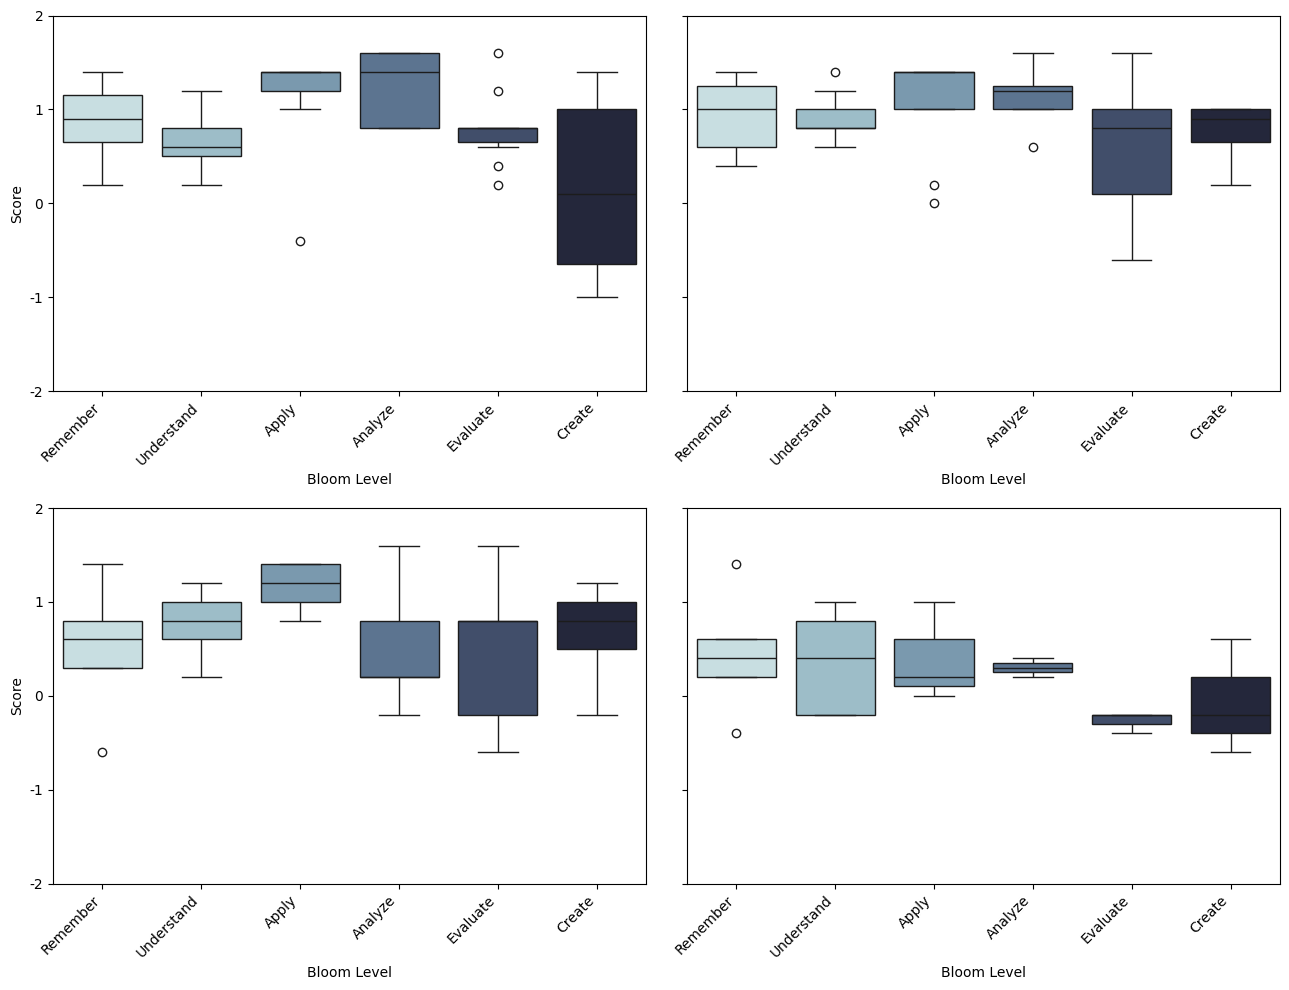

In [ ]:
llm_labels = {
    1: "BloomGPT",
    2: "Code Tutor",
    3: "Copilot",
    4: "LLaMa"
}


# Define LLMs and Bloom levels
llms = df['llm'].unique()
bloom_levels = sorted(df['bloom_level'].unique())  # Ensure levels are sorted

# Create a figure with 2 rows and 3 columns of subplots
fig, axes = plt.subplots(2, 2, figsize=(13, 10), sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define a color palette
# palette = sns.color_palette("seismic")
# palette = ['indigo', 'blue', 'green', 'yellow', 'orange', 'red']

palette = sns.cubehelix_palette(rot=-.2)



# Set y-axis limits
y_limits = (-2, 2)

# Iterate over each LLM and its corresponding subplot
for idx, llm in enumerate(llms):
    subset = df[df['llm'] == llm]

    # Perform ANOVA
    anova = f_oneway(*[subset[subset['bloom_level'] == level]['bloom_mean'] for level in bloom_levels])
    print(f"ANOVA Results for LLM {llm}: ", anova)

    # Post-hoc test
    tukey = pairwise_tukeyhsd(endog=subset['bloom_mean'], groups=subset['bloom_level'], alpha=0.05)
    print(f"\nPost-hoc test for LLM {llm}:\n", tukey)

    # Plotting
    ax = axes[idx]
    sns.boxplot(x='bloom_level', y='bloom_mean', data=subset, palette=palette, ax=ax)

    ax.set_ylim(y_limits)
    ax.set_yticks([-2, -1, 0, 1, 2])
    ax.set_yticklabels([-2, -1, 0, 1, 2])
    ax.set_xlabel('Bloom Level', fontsize=10)
    ax.set_ylabel('Score', fontsize=10)

    # Set x-axis labels
    bloom_labels = ['Remember', 'Understand', 'Apply', 'Analyze', 'Evaluate', 'Create']
    ax.set_xticks(range(len(bloom_levels)))
    ax.set_xticklabels(bloom_labels, rotation=45, ha='right')

    # Set title for each subplot
    # ax.set_title(f'Bloom Alignment for "{llm_labels[llm]}"', fontsize=14)

# Adjust layout to prevent clipping and show the plot
plt.tight_layout()
plt.show()


In [ ]:
average_per_llm = df.groupby('llm')[['bloom_mean', 'subject_mean', 'persian_mean']].mean().reset_index()

# Display the result
print(average_per_llm)

In [ ]:
import pandas as pd
import pingouin as pg

# Assuming df is your full DataFrame
aspects = ['bloom', 'subject', 'persian']
icc_results = {}

for aspect in aspects:
    # Reshape the DataFrame for each aspect
    aspect_data = df[[f'expert{i}_{aspect}' for i in range(1, 6)]]

    # Calculate ICC(3) for each aspect
    icc = pg.intraclass_corr(data=pd.melt(aspect_data.reset_index(), id_vars=['index']),
                             targets='index',
                             raters='variable',
                             ratings='value')
    icc_value = icc[icc['Type'] == 'ICC3'].iloc[0]['ICC']
    icc_results[aspect] = icc_value

print("ICC(3) for Bloom Aspect: ", icc_results['bloom'])
print("ICC(3) for Subject Aspect: ", icc_results['subject'])
print("ICC(3) for Persian Aspect: ", icc_results['persian'])


ICC(3) for Bloom Aspect:  0.24766316392528162
ICC(3) for Subject Aspect:  0.03564926079673736
ICC(3) for Persian Aspect:  0.28197912500238065


In [ ]:
import pandas as pd
import pingouin as pg
from itertools import combinations

# Assuming df is your full DataFrame
aspects = ['bloom', 'subject', 'persian']
num_experts = 5
icc_results = {}

for aspect in aspects:
    # Store ICC results for each aspect
    aspect_icc_results = {}

    # Generate all combinations of experts with one expert removed
    for i in range(1, num_experts + 1):
        experts_to_keep = [j for j in range(1, num_experts + 1) if j != i]
        aspect_data = df[[f'expert{j}_{aspect}' for j in experts_to_keep]]

        # Calculate ICC(3) for each combination of experts
        icc = pg.intraclass_corr(data=pd.melt(aspect_data.reset_index(), id_vars=['index']),
                                 targets='index',
                                 raters='variable',
                                 ratings='value')
        icc_value = icc[icc['Type'] == 'ICC3'].iloc[0]['ICC']

        # Store the ICC value with information about which expert was removed
        aspect_icc_results[f'removed_expert_{i}'] = icc_value

    # Store the results for the current aspect
    icc_results[aspect] = aspect_icc_results

# Display the results
for aspect, results in icc_results.items():
    print(f"\nICC(3) for {aspect.capitalize()} Aspect:")
    for removed_expert, icc_value in results.items():
        print(f" - {removed_expert}: {icc_value}")



ICC(3) for Bloom Aspect:
 - removed_expert_1: 0.20272054511636603
 - removed_expert_2: 0.23314443621217876
 - removed_expert_3: 0.23185539534700264
 - removed_expert_4: 0.30623775570990786
 - removed_expert_5: 0.2577864885356637

ICC(3) for Subject Aspect:
 - removed_expert_1: 0.03162602574573157
 - removed_expert_2: -0.04670226719130603
 - removed_expert_3: 0.042087447108603626
 - removed_expert_4: 0.0329998474247476
 - removed_expert_5: 0.08219289175435389

ICC(3) for Persian Aspect:
 - removed_expert_1: 0.22273981298371529
 - removed_expert_2: 0.25655846231109886
 - removed_expert_3: 0.27915491267030773
 - removed_expert_4: 0.365293867756639
 - removed_expert_5: 0.2702629990765585


In [ ]:
import pandas as pd
import pingouin as pg
from itertools import combinations

# Assuming df is your full DataFrame
aspects = ['bloom', 'subject', 'persian']
num_experts = 5
icc_results = {}

for aspect in aspects:
    # Store ICC results for each aspect
    aspect_icc_results = {}

    # Generate all combinations of experts with two experts removed
    for combo in combinations(range(1, num_experts + 1), num_experts - 2):
        experts_to_keep = list(combo)
        aspect_data = df[[f'expert{j}_{aspect}' for j in experts_to_keep]]

        # Calculate ICC(3) for each combination of experts
        icc = pg.intraclass_corr(data=pd.melt(aspect_data.reset_index(), id_vars=['index']),
                                 targets='index',
                                 raters='variable',
                                 ratings='value')
        icc_value = icc[icc['Type'] == 'ICC3'].iloc[0]['ICC']

        # Store the ICC value with information about which experts were removed
        removed_experts = [j for j in range(1, num_experts + 1) if j not in experts_to_keep]
        aspect_icc_results[f'removed_experts_{removed_experts}'] = icc_value

    # Store the results for the current aspect
    icc_results[aspect] = aspect_icc_results

# Display the results
for aspect, results in icc_results.items():
    print(f"\nICC(3) for {aspect.capitalize()} Aspect:")
    for removed_experts, icc_value in results.items():
        print(f" - {removed_experts}: {icc_value}")



ICC(3) for Bloom Aspect:
 - removed_experts_[4, 5]: 0.3418077474892396
 - removed_experts_[3, 5]: 0.2354240419449059
 - removed_experts_[3, 4]: 0.3061646888997388
 - removed_experts_[2, 5]: 0.2832413415084961
 - removed_experts_[2, 4]: 0.2583339931902764
 - removed_experts_[2, 3]: 0.2051602796417968
 - removed_experts_[1, 5]: 0.157390767157138
 - removed_experts_[1, 4]: 0.3140818976206799
 - removed_experts_[1, 3]: 0.16720084787966236
 - removed_experts_[1, 2]: 0.1756050306482049

ICC(3) for Subject Aspect:
 - removed_experts_[4, 5]: 0.10181736928347998
 - removed_experts_[3, 5]: 0.1146634716441758
 - removed_experts_[3, 4]: 0.036641740312712515
 - removed_experts_[2, 5]: 0.004855005904736855
 - removed_experts_[2, 4]: -0.0777073999691023
 - removed_experts_[2, 3]: -0.07834549878345497
 - removed_experts_[1, 5]: 0.06697267407526683
 - removed_experts_[1, 4]: 0.009849157054126556
 - removed_experts_[1, 3]: 0.04220795017758979
 - removed_experts_[1, 2]: -0.030314120158585457

ICC(3) for

In [ ]:
import pandas as pd
import pingouin as pg
from itertools import combinations

# Assuming df is your full DataFrame
aspects = ['bloom', 'subject', 'persian']
num_experts = 5
icc_results = {}

for aspect in aspects:
    # Store ICC results for each aspect
    aspect_icc_results = {}

    # Generate all combinations of experts with three experts removed
    for combo in combinations(range(1, num_experts + 1), num_experts - 3):
        experts_to_keep = list(combo)
        aspect_data = df[[f'expert{j}_{aspect}' for j in experts_to_keep]]

        # Calculate ICC(3) for each combination of experts
        icc = pg.intraclass_corr(data=pd.melt(aspect_data.reset_index(), id_vars=['index']),
                                 targets='index',
                                 raters='variable',
                                 ratings='value')
        icc_value = icc[icc['Type'] == 'ICC3'].iloc[0]['ICC']

        # Store the ICC value with information about which experts were removed
        removed_experts = [j for j in range(1, num_experts + 1) if j not in experts_to_keep]
        aspect_icc_results[f'removed_experts_{removed_experts}'] = icc_value

    # Store the results for the current aspect
    icc_results[aspect] = aspect_icc_results

# Display the results
for aspect, results in icc_results.items():
    print(f"\nICC(3) for {aspect.capitalize()} Aspect:")
    for removed_experts, icc_value in results.items():
        print(f" - {removed_experts}: {icc_value}")



ICC(3) for Bloom Aspect:
 - removed_experts_[3, 4, 5]: 0.3605138421378032
 - removed_experts_[2, 4, 5]: 0.3488821418713774
 - removed_experts_[2, 3, 5]: 0.2870111840771187
 - removed_experts_[2, 3, 4]: 0.1867044307712342
 - removed_experts_[1, 4, 5]: 0.3047538200339555
 - removed_experts_[1, 3, 5]: 0.017228043034948216
 - removed_experts_[1, 3, 4]: 0.3685734841078049
 - removed_experts_[1, 2, 5]: 0.18416397877432106
 - removed_experts_[1, 2, 4]: 0.2437865190528111
 - removed_experts_[1, 2, 3]: 0.11481782443502522

ICC(3) for Subject Aspect:
 - removed_experts_[3, 4, 5]: 0.1754522567416755
 - removed_experts_[2, 4, 5]: 0.03777681285280071
 - removed_experts_[2, 3, 5]: -0.005209813393956866
 - removed_experts_[2, 3, 4]: -0.19275608375778155
 - removed_experts_[1, 4, 5]: 0.03261370484597021
 - removed_experts_[1, 3, 5]: 0.11998310097169401
 - removed_experts_[1, 3, 4]: -0.0037428651632829143
 - removed_experts_[1, 2, 5]: -0.017602371687974357
 - removed_experts_[1, 2, 4]: -0.018231292517